<a href="https://colab.research.google.com/github/estebangaviria/Connection-to-MYSQL-with-python/blob/main/iFood_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('/content/ifood.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Análisis Exploratorio 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Nota1: Se detecta presencia de datos 24 datos nulos para la columna "Income", por lo que se tendrá en cuenta mas adelante si se requiere hacer un análisis con esta columna. 

Nota2: La columna Dt_Customer tiene datos de tipo object, por lo que, para realizar analisis con series de tiempo de debe convertir a tipo de dato datatime. 

In [6]:
#Análisis estadístico descriptivo de los datos numericos:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Se obserba la posible existencia de datos atipicos en la columna "Income", ya que los valores 35303.00,	51381.5 y 68522.00 para los cuartiles 25%, 50% y 75% respectivamente estan alejados del valor máximo: 666666.0. Para corroboarlo se hace un boxplot:

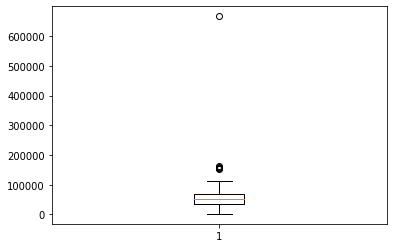

In [7]:
income = df['Income'].dropna()
plt.boxplot([income])
plt.show()

Nota3: Como se observa en el grafico de cajas, efectivamente se encuentra valores atípicos que podrían afectar la estadística, por lo que se debe corroborar si el dato es real o es un error para proceder a eliminarlo. 


In [8]:
#Análisis estadístico descriptivo de los datos categóricos:
df.describe(include='O')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


Nota4: No se encuentran errores para los datos categoricos, unicamente se debería cambiar la columna DT_Customer a tipo de dato date para su posterior análisis. 

## Resultados Análisis exploratorio:


*   Presencia de 24 valores nulos para la columna "Income"
*   Tipo de dato incorrecto para columna "Dt_Customer", tipo object, debería ser tipo date
*   Presencia de valores atípicos para la columna "Income"



# Limpieza de **datos**

## Datos Atípicos:

income.describe()

In [9]:
# copia del dataframe original
copy_df= df.copy()
copy_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
#copy_df = copy_df.reset_index()

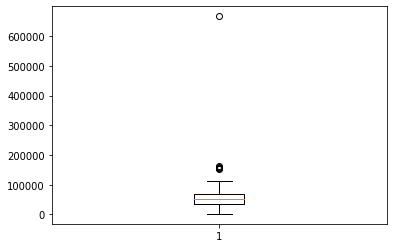

In [11]:
df_aux = df.copy()
df_aux['Income'] = copy_df['Income']

# Obtenemos la columna, la guardamos en una variable y con el método dropna() quitamos los valores nulos
# para que al dibujar la gráfica de cajas y bigotes no nos dé ningún problema.
income = copy_df['Income'].dropna()

# Dibujamos la gráfica de cajas y bigotes.
plt.boxplot([income])
plt.show()

In [12]:
# Usamos el método quantile() para obtener los cuartiles 1 (25%) y 3 (75%)
uc_q1 = copy_df['Income'].quantile(0.25)
uc_q3 = copy_df['Income'].quantile(0.75)

# Calculamos el rango intercuartil
uc_iqr = uc_q3 - uc_q1

# Calculamos el valor de los bigotes inferior y superior
uc_lw = uc_q1 - (1.5 * uc_iqr)
uc_uw = uc_q3 + (1.5 * uc_iqr)

# Verificamos los resultados
print('Primer cuartil: ', uc_q1)
print('Tercer cuartil: ', uc_q3)
print('Rango intercuartil: ', uc_iqr)
print('Bigote inferior: ', uc_lw)
print('Bigote superior: ', uc_uw)

Primer cuartil:  35303.0
Tercer cuartil:  68522.0
Rango intercuartil:  33219.0
Bigote inferior:  -14525.5
Bigote superior:  118350.5


In [13]:
# Armamos una condición lógica y la guardamos en una variable.
uc_outliers = (copy_df['Income'] < uc_lw) | (copy_df['Income'] > uc_uw)

# Usamos el atributo loc para acceder a todos los registros que cumplan la condición especificada y reemplazamos todos los 
# valores de dichos registros para la columna elegida con el valor nulo.
copy_df.loc[uc_outliers, 'Income'] = np.nan

# Guardamos el avance del manejo de outliers para la columna.
df_aux['Income'] = copy_df['Income']

# Volvemos a usar los métodos isna() y sum() para verificar los valores nulos de cada columna.
copy_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 32
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Como se observa, los valores nulos aumentaron al momento de reeplazar los datos atípicos.

## Valores Nulos

La columna ahora presenta 32 valores nulos, por lo que para reemplazarlos por una medida de tendencia central como la media, primero se debe comprobar que los datos se distribuyen de forma normal (Campana de Gauss):

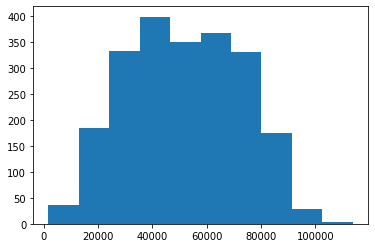

In [14]:
income = copy_df['Income']
plt.hist(income)
plt.show()

Dado que el histograma para Income presenta forma acampanada se presume que puede tener una distribución normal, por tanto se pueden reemplazar los datos nulos por la media.

In [19]:
# Usamos el método mean() para obtener el valor de la mediana y lo guardamos en una variable.
income_mean = income.mean()

# Con el método fillna() reemplazamos los valores nulos de una columna por un nuevo valor.
copy_df.fillna(value={'Income': income_mean }, inplace=True)

# Verificamos nuevamente el número de nulos.
copy_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Ahora ya no se cuenta con presencia de datos nulos en la columna "Income"

## Cambio de tipo de datos:

In [16]:
# se cambia el tipo de dato de la columna "Dt_Customer" de object a datetime:
copy_df['Dt_Customer'] = pd.to_datetime(copy_df['Dt_Customer'])

In [17]:
copy_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Terminada la limpieza de los datos ya se cuenta con un dataframe listo para ser analizado:

In [18]:
copy_df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Análisis de datos

El proposito del analisis de datos es comprender el comporamiento de los mismos e identifeciar las posibles variables que podrían influir en la desición de tomar o no la oferta de la campaña. 

In [20]:
copy_df.describe(include='O')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [21]:
copy_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [22]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Los resultados de la campaña en estudio se encuentran en la columna "Response", por tanto, se analizará el tipo de usuarios que aceptaron la oferta para diferenciarlos de los que no. 

In [23]:
si_df = copy_df[copy_df['Response']==1]
no_df = copy_df[copy_df['Response']==0]

In [24]:
si_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,334.0,5421.820359,3154.132439,1.0,2785.25,5133.0,8127.75,11133.0
Year_Birth,334.0,1969.416168,12.398192,1943.0,1959.00,1971.0,1979.00,1996.0
Income,334.0,60183.998917,23163.982515,7500.0,39786.75,64044.0,80477.00,105471.0
Kidhome,334.0,0.341317,0.487347,0.0,0.00,0.0,1.00,2.0
Teenhome,334.0,0.305389,0.492741,0.0,0.00,0.0,1.00,2.0
Recency,334.0,35.383234,27.659499,0.0,11.00,30.0,56.00,99.0
MntWines,334.0,502.703593,427.183786,1.0,96.00,448.0,875.50,1492.0
MntFruits,334.0,38.203593,46.099519,0.0,4.00,21.0,53.75,193.0
MntMeatProducts,334.0,294.353293,286.890036,1.0,47.75,174.5,509.75,981.0
MntFishProducts,334.0,52.050898,61.855885,0.0,4.00,25.0,84.25,250.0


In [25]:
no_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1906.0,5622.009444,3262.498976,0.0,2839.25,5528.0,8471.75,11191.0
Year_Birth,1906.0,1968.698846,11.910143,1893.0,1959.00,1970.0,1977.00,1996.0
Income,1906.0,50135.306287,19702.844096,1730.0,34560.00,50567.0,65727.25,113734.0
Kidhome,1906.0,0.462225,0.544975,0.0,0.00,0.0,1.00,2.0
Teenhome,1906.0,0.541448,0.545670,0.0,0.00,1.0,1.00,2.0
Recency,1906.0,51.514690,28.519092,0.0,27.00,52.0,77.00,99.0
MntWines,1906.0,269.104407,305.159188,0.0,21.25,152.0,443.75,1493.0
MntFruits,1906.0,24.216684,38.191763,0.0,1.00,7.0,28.00,199.0
MntMeatProducts,1906.0,144.624344,205.299936,0.0,14.00,56.0,192.75,1725.0
MntFishProducts,1906.0,34.980063,52.870253,0.0,2.00,11.0,43.00,259.0


## Gráfico de distribución para cada variable numérica de los usuarios que aceptaron la oferta

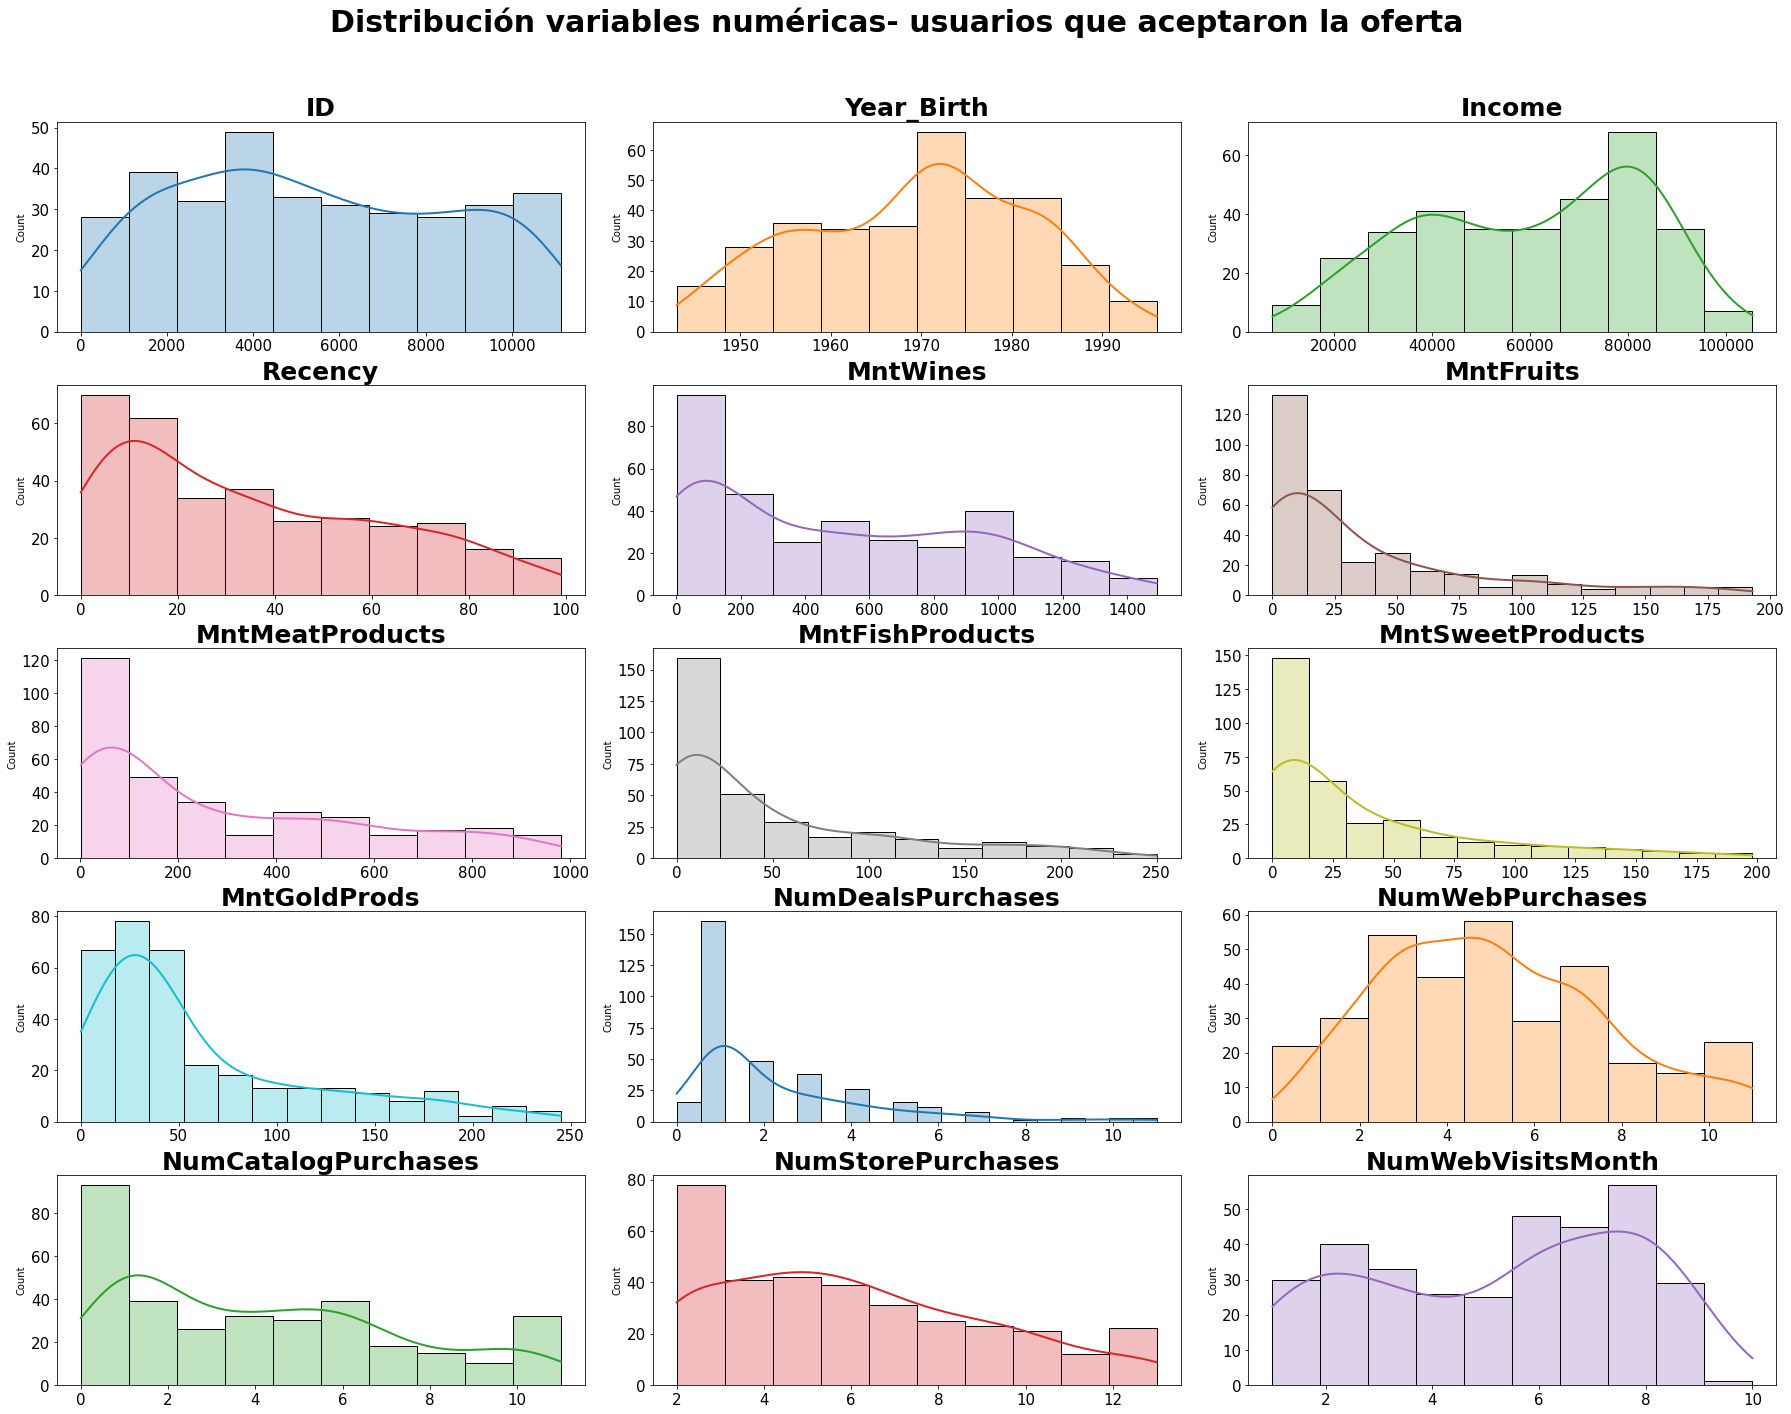

In [26]:
# Gráfico de distribución para cada variable numérica de los usuarios que aceptaron la oferta
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
import seaborn as sns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25, 20))
axes = axes.flat
columnas_numeric = si_df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop( ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Kidhome', 'Teenhome', 'Complain'])

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = si_df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas- usuarios que aceptaron la oferta', fontsize = 30, fontweight = "bold");

## Gráfico de distribución para cada variable numérica  de los usuarios que no aceptaron la oferta 

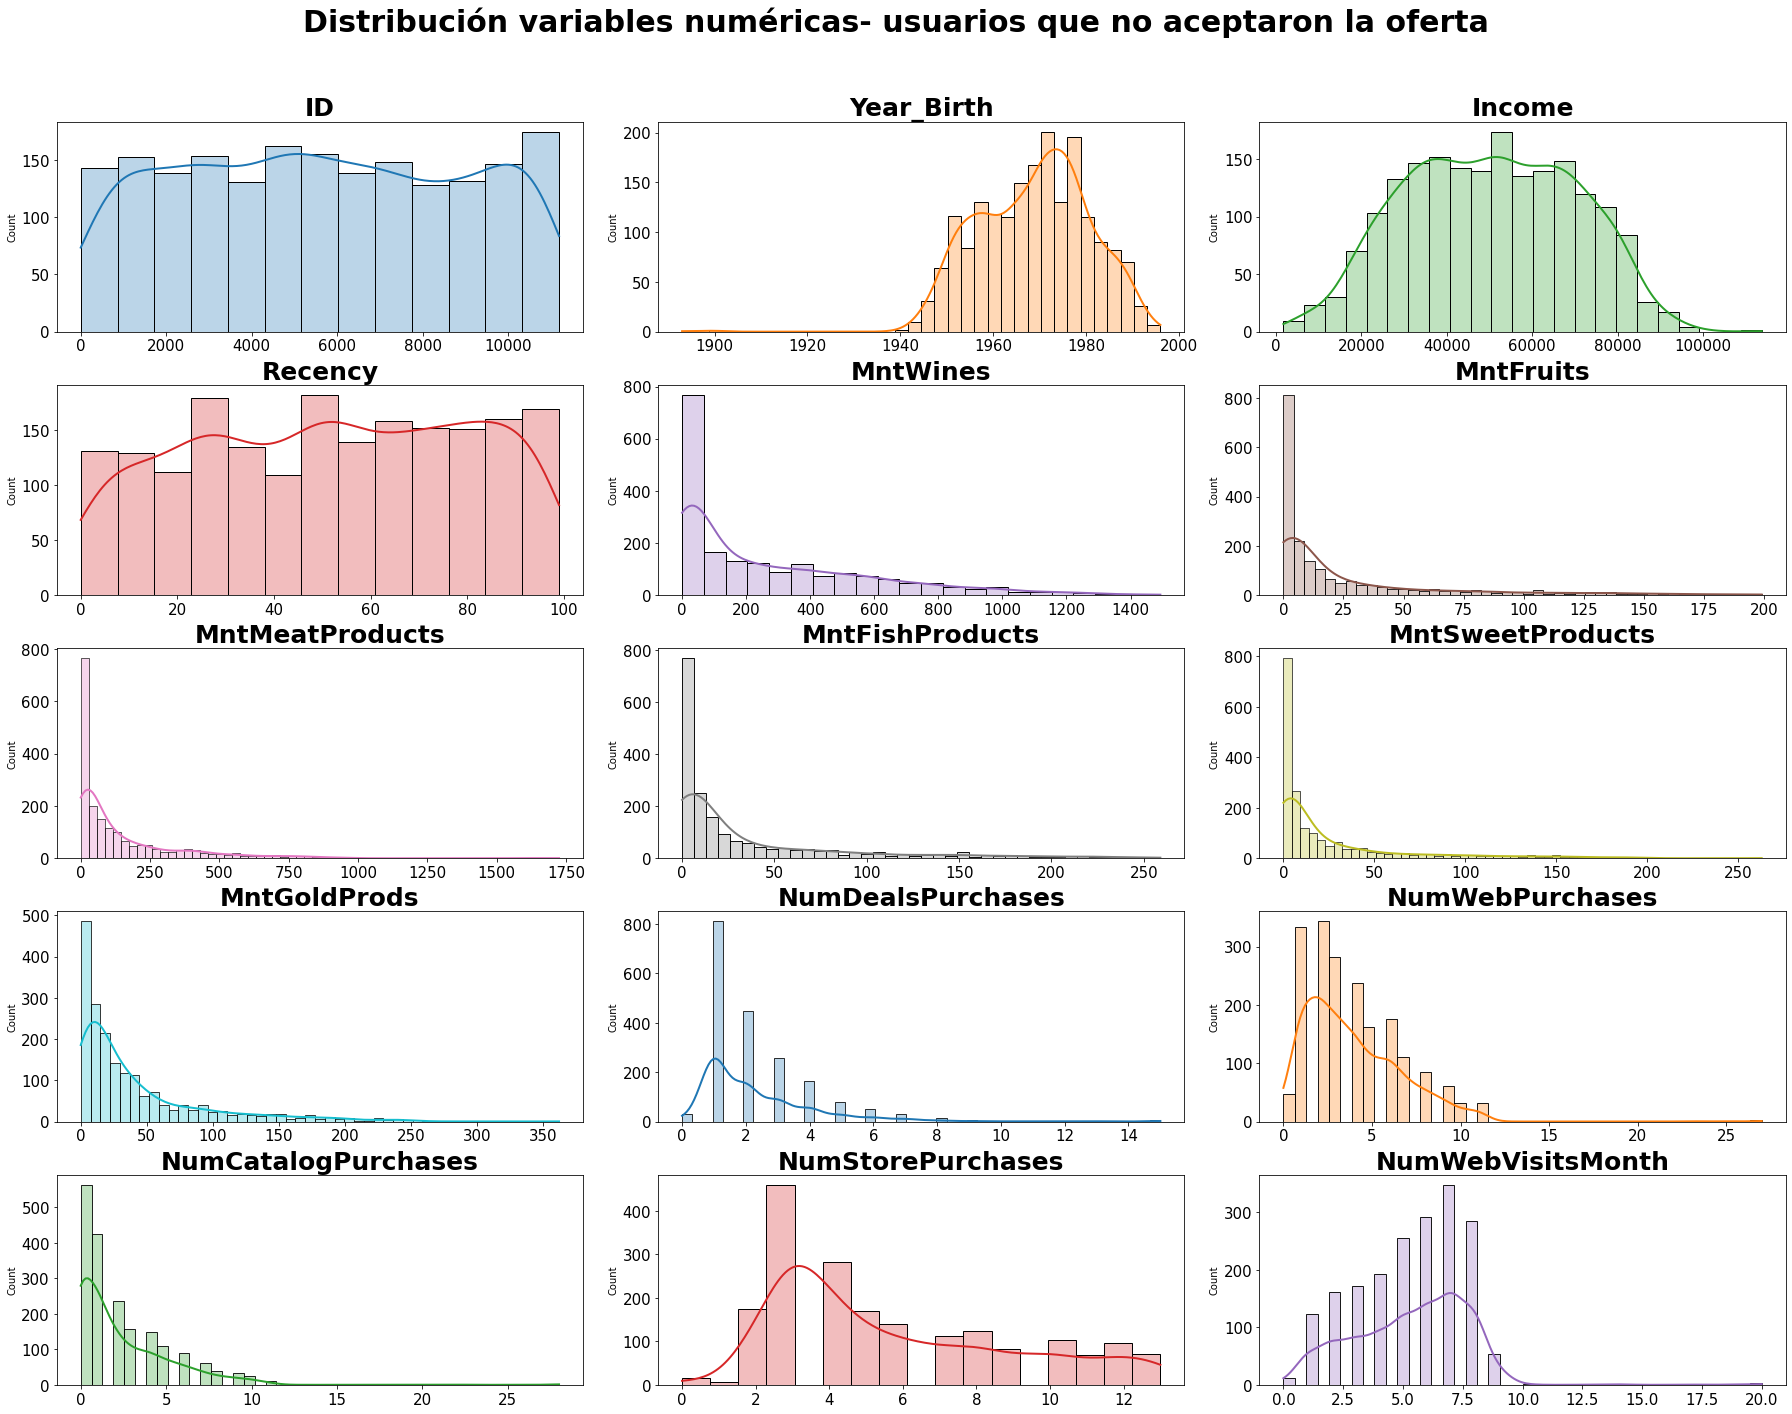

In [27]:
# Gráfico de distribución para cada variable numérica  de los usuarios que no aceptaron la oferta 
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
import seaborn as sns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25, 20))
axes = axes.flat
columnas_numeric = no_df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop( ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Kidhome', 'Teenhome', 'Complain'])

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = no_df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas- usuarios que no aceptaron la oferta', fontsize = 30, fontweight = "bold");

## Analisis de variables de interés

### Income

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


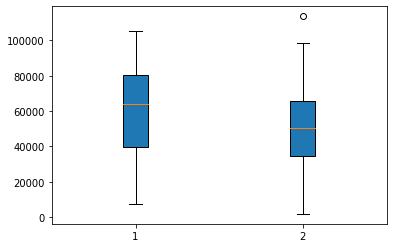

In [28]:

plt.boxplot([si_df['Income'], no_df['Income']], vert=True, patch_artist=True) 
plt.show()

El rango intercuartil del Income de usuarios que aceptaron la oferta es mayor del que no lo hizo, por tanto puede existir una relación. 

### Recency

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


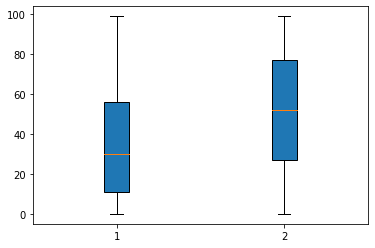

In [29]:
plt.boxplot([si_df['Recency'], no_df['Recency']], vert=True, patch_artist=True) 
plt.show()

El rango intercuartil de los datos de Recency es menor si se tiene en cuenta los usuarios que si aceptaron la oferta vs los que no lo hicieron

### Education y Marital_Status

In [30]:
si_df.select_dtypes(include=['object'])

,Education,Marital_Status
0,Graduation,Single
8,PhD,Together
15,PhD,Single
33,PhD,Divorced
39,PhD,Divorced
...,...,...
2194,Graduation,Married
2198,Graduation,Married
2202,PhD,YOLO
2221,Master,Single


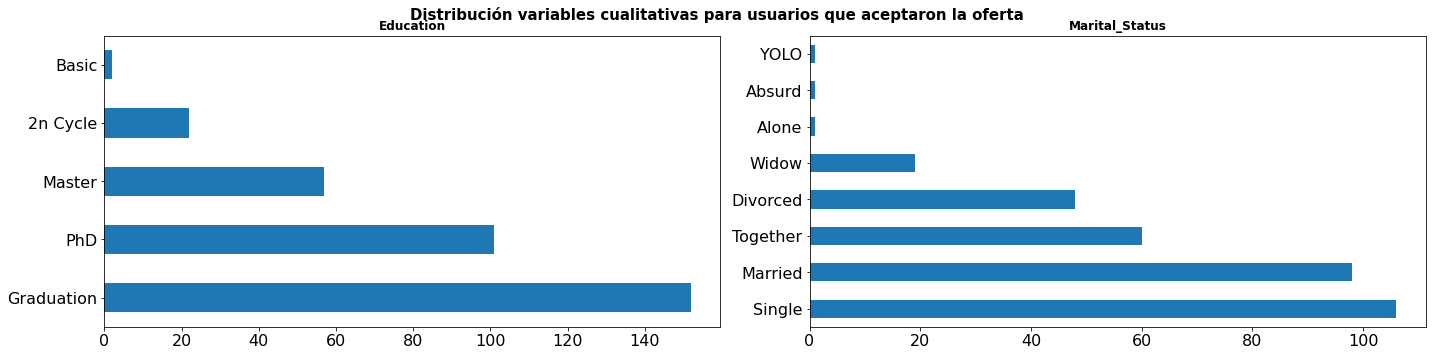

In [31]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes = axes.flat
columnas_object = si_df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    si_df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
# for i in [7, 8]:
#     fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas para usuarios que aceptaron la oferta',
             fontsize = 15, fontweight = "bold");

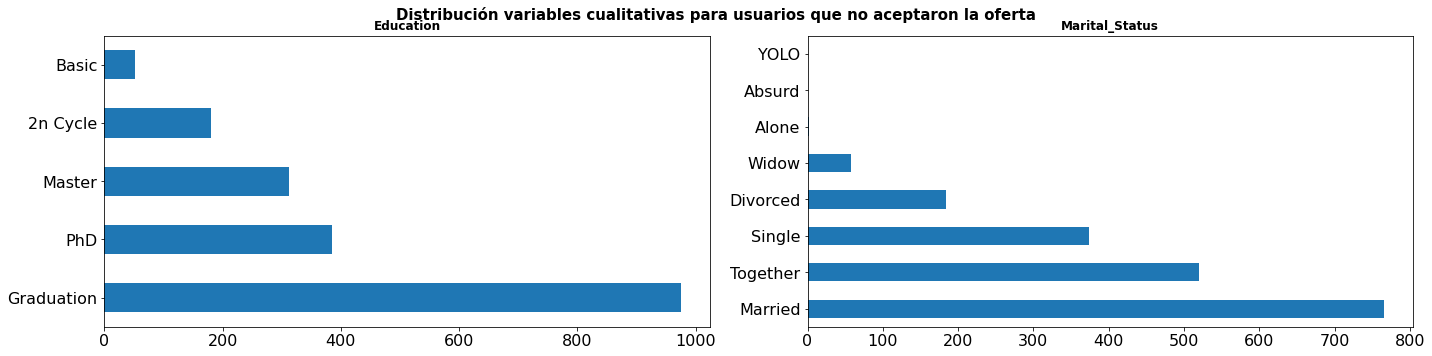

In [32]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes = axes.flat
columnas_object = no_df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    no_df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
# for i in [7, 8]:
#     fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas para usuarios que no aceptaron la oferta',
             fontsize = 15, fontweight = "bold");

Al comparar el comportamiento de las variables numericas y categoricas de los datos de los clientes que si aceptaron la oferta de la campaña vs los que no, se encuentra de manera gráfica diferencias en el compartamiento para variables como: Income, Recency, Marital_Status, Education. Por lo que para este ejercicio se utilizaran en el modelo predictivo.

# Creación modelo predictivo 

## Analisis de variables en estudio:

### Column Education


In [33]:
education = copy_df.iloc[:, [2,28]]
education

,Education,Response
0,Graduation,1
1,Graduation,0
2,Graduation,0
3,Graduation,0
4,PhD,0
...,...,...
2235,Graduation,0
2236,PhD,0
2237,Graduation,0
2238,Master,0


In [34]:
t_graduation= len(education[education['Education']=='Graduation'])
t_phd= len(education[education['Education']=='PhD'])
t_master = len(education[education['Education']=='Master'])
t_2ncicle = len(education[education['Education']=='2n Cycle'])
t_basic= len(education[education['Education']=='Basic'])

In [35]:
education = education.groupby('Education', as_index=False).sum()

In [38]:
conditionlist = [
    (education['Education'] == 'Graduation') ,
    (education['Education'] == 'Master'),
    (education['Education'] == 'PhD'),
    (education['Education'] == 'Basic'),
    (education['Education'] == '2n Cycle')]
choicelist = [t_graduation, t_master, t_phd, t_basic, t_2ncicle]
education['count'] = np.select(conditionlist, choicelist)


In [40]:
education['%Response']= education['Response']/education['Response'].sum()

In [41]:
education['%Response2']= education['Response']/education['count']

In [42]:
education['%Final']= education['%Response']*education['%Response2']

In [43]:
education

,Education,Response,count,%Response,%Response2,%Final
0,2n Cycle,22,203,0.065868,0.108374,0.007138
1,Basic,2,54,0.005988,0.037037,0.000222
2,Graduation,152,1127,0.455090,0.134871,0.061379
3,Master,57,370,0.170659,0.154054,0.026291
4,PhD,101,486,0.302395,0.207819,0.062843


In [44]:
education = education.iloc[:,[0, 5]]

In [45]:
education

,Education,%Final
0,2n Cycle,0.007138
1,Basic,0.000222
2,Graduation,0.061379
3,Master,0.026291
4,PhD,0.062843


### Column Marital_Status

In [46]:
marital_status = copy_df.iloc[:, [3,28]]
marital_status

,Marital_Status,Response
0,Single,1
1,Single,0
2,Together,0
3,Together,0
4,Married,0
...,...,...
2235,Married,0
2236,Together,0
2237,Divorced,0
2238,Together,0


In [47]:
t_absurd= len(marital_status[marital_status['Marital_Status']=='Absurd'])
t_alone= len(marital_status[marital_status['Marital_Status']=='Alone'])
t_divorced	= len(marital_status[marital_status['Marital_Status']=='Divorced'])
t_married= len(marital_status[marital_status['Marital_Status']=='Married'])
t_single= len(marital_status[marital_status['Marital_Status']=='Single'])
t_together= len(marital_status[marital_status['Marital_Status']=='Together'])
t_widow	= len(marital_status[marital_status['Marital_Status']=='Widow'])
t_yolo= len(marital_status[marital_status['Marital_Status']=='YOLO'])

In [48]:
marital_status = marital_status.groupby('Marital_Status', as_index=False).sum()

In [50]:
conditionlist = [
    (marital_status['Marital_Status'] == 'Absurd') ,
    (marital_status['Marital_Status'] == 'Alone'),
    (marital_status['Marital_Status'] == 'Divorced'),
    (marital_status['Marital_Status'] == 'Married'),
    (marital_status['Marital_Status'] == 'Single'),
    (marital_status['Marital_Status'] == 'Together'),
    (marital_status['Marital_Status'] == 'Widow'),
    (marital_status['Marital_Status'] == 'YOLO')]
choicelist = [t_absurd, t_alone, t_divorced, t_married, t_single, t_together, t_widow, t_yolo]
marital_status['count'] = np.select(conditionlist, choicelist)

In [51]:
marital_status['%Response']= marital_status['Response']/marital_status['Response'].sum()

In [52]:
marital_status['%Response2']= marital_status['Response']/marital_status['count']

In [53]:
marital_status['%Marital_Status']= marital_status['%Response']*marital_status['%Response2']

In [55]:
marital_status = marital_status.iloc[:,[0,5]]

In [56]:
marital_status

,Marital_Status,%Marital_Status
0,Absurd,0.001497
1,Alone,0.000998
2,Divorced,0.029734
3,Married,0.033281
4,Single,0.070085
5,Together,0.018584
6,Widow,0.014037
7,YOLO,0.001497


### Income

In [57]:
income = copy_df.iloc[:, [4,28]]
income

,Income,Response
0,58138.0,1
1,46344.0,0
2,71613.0,0
3,26646.0,0
4,58293.0,0
...,...,...
2235,61223.0,0
2236,64014.0,0
2237,56981.0,0
2238,69245.0,0


In [58]:
t_0_15= len(income[(income.Income >=0) & (income.Income <=15000)])
t_16_30= len(income[(income.Income >15000) & (income.Income <=30000)])
t_31_45	= len(income[(income.Income >30000) & (income.Income <=45000)])
t_46_60= len(income[(income.Income >45000) & (income.Income <=60000)])
t_61_75= len(income[(income.Income >60000) & (income.Income <=75000)])
t_76_90= len(income[(income.Income >75000) & (income.Income <=90000)])
t_91plus	= len(income[income.Income >90000])


In [59]:
t_0_15,t_16_30, t_31_45, t_46_60, t_61_75, t_76_90, t_91plus

(52, 318, 530, 507, 482, 306, 45)

In [60]:
def f (income):
    if income['Income'] >=0 and income['Income'] <=15000:
      val = '0-15000'
    elif income['Income'] >15000 and income['Income'] <=30000:
      val = '16000-30000'
    elif income['Income'] >30000 and income['Income'] <=45000:
      val = '31000-45000'
    elif income['Income'] >45000 and income['Income'] <=60000:
      val = '46000-60000'
    elif income['Income'] >60000 and income['Income'] <=75000:
      val = '61000-75000'  
    elif income['Income'] >75000 and income['Income'] <=90000:
      val = '76000-90000'
    else:
      val = '90000_mas'
    return val

#cree una nueva columna 'Bueno' usando la función anterior 
income['grupo'] = income.apply(f, axis = 1)

#view Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [62]:
prueba= income.groupby('grupo', as_index=False).sum()

In [63]:
prueba

,grupo,Income,Response
0,0-15000,4.990230e+05,5
1,16000-30000,7.447532e+06,34
2,31000-45000,1.983494e+07,64
3,46000-60000,2.656377e+07,50
4,61000-75000,3.238326e+07,62
5,76000-90000,2.468786e+07,93
6,90000_mas,4.242966e+06,26


In [64]:
conditionlist = [
    (prueba['grupo'] == '0-15000') ,
    (prueba['grupo'] == '16000-30000'),
    (prueba['grupo'] == '31000-45000'),
    (prueba['grupo'] == '46000-60000'),
    (prueba['grupo'] == '61000-75000'),
    (prueba['grupo'] == '76000-90000'),
    (prueba['grupo'] == '90000_mas')]
choicelist = [t_0_15,t_16_30, t_31_45, t_46_60, t_61_75, t_76_90, t_91plus]
prueba['count'] = np.select(conditionlist, choicelist)

In [66]:
prueba['%income']=prueba['Response']/prueba['count']

In [67]:
prueba

,grupo,Income,Response,count,%income
0,0-15000,4.990230e+05,5,52,0.096154
1,16000-30000,7.447532e+06,34,318,0.106918
2,31000-45000,1.983494e+07,64,530,0.120755
3,46000-60000,2.656377e+07,50,507,0.098619
4,61000-75000,3.238326e+07,62,482,0.128631
5,76000-90000,2.468786e+07,93,306,0.303922
6,90000_mas,4.242966e+06,26,45,0.577778


In [68]:
prueba['%income_mejorado'] = prueba['Response']/prueba['Response'].sum()

In [69]:
prueba['%income_final']= prueba['%income']*prueba['%income_mejorado']

In [70]:
prueba

,grupo,Income,Response,count,%income,%income_mejorado,%income_final
0,0-15000,4.990230e+05,5,52,0.096154,0.014970,0.001439
1,16000-30000,7.447532e+06,34,318,0.106918,0.101796,0.010884
2,31000-45000,1.983494e+07,64,530,0.120755,0.191617,0.023139
3,46000-60000,2.656377e+07,50,507,0.098619,0.149701,0.014763
4,61000-75000,3.238326e+07,62,482,0.128631,0.185629,0.023878
5,76000-90000,2.468786e+07,93,306,0.303922,0.278443,0.084625
6,90000_mas,4.242966e+06,26,45,0.577778,0.077844,0.044977


In [71]:
prueba = prueba.iloc[:,[0, 6]]

In [72]:
prueba.columns

Index(['grupo', '%income_final'], dtype='object')

### Recency


In [105]:
recency = copy_df.iloc[:, [8,28]]
recency.head()

,Recency,Response
0,58,1
1,38,0
2,26,0
3,26,0
4,94,0


In [106]:
recency.describe()

,Recency,Response
count,2240.000000,2240.000000
mean,49.109375,0.149107
std,28.962453,0.356274
min,0.000000,0.000000
25%,24.000000,0.000000
50%,49.000000,0.000000
75%,74.000000,0.000000
max,99.000000,1.000000


In [107]:
t_0_15= len(recency[(recency.Recency >=0) & (recency.Recency <=15)])
t_16_30= len(recency[(recency.Recency >15) & (recency.Recency <=30)])
t_31_45	= len(recency[(recency.Recency >30) & (recency.Recency <=45)])
t_46_60= len(recency[(recency.Recency >45) & (recency.Recency <=60)])
t_61_75= len(recency[(recency.Recency >60) & (recency.Recency <=75)])
t_76plus= len(recency[recency.Recency >75])


In [108]:
t_0_15,t_16_30, t_31_45, t_46_60, t_61_75, t_76plus

(371, 353, 290, 364, 328, 534)

In [109]:
def f (recency):
    if recency['Recency'] >=0 and recency['Recency'] <=15:
      val = '0-15'
    elif recency['Recency'] >15 and recency['Recency'] <=30:
      val = '16-30'
    elif recency['Recency'] >30 and recency['Recency'] <=45:
      val = '31-45'
    elif recency['Recency'] >45 and recency['Recency'] <=60:
      val = '46-60'
    elif recency['Recency'] >60 and recency['Recency'] <=75:
      val = '61-75'  
    else:
      val = '76_mas'
    return val

#cree una nueva columna 'grupo_recenty' usando la función anterior 
recency['grupo_recency'] = recency.apply(f, axis = 1)

#view Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [110]:
recency

,Recency,Response,grupo_recency
0,58,1,46-60
1,38,0,31-45
2,26,0,16-30
3,26,0,16-30
4,94,0,76_mas
...,...,...,...
2235,46,0,46-60
2236,56,0,46-60
2237,91,0,76_mas
2238,8,0,0-15


In [111]:
recency = recency.groupby('grupo_recency', as_index=False).sum()

In [112]:
recency

,grupo_recency,Recency,Response
0,0-15,2667,111
1,16-30,8301,62
2,31-45,10959,46
3,46-60,19149,43
4,61-75,22318,34
5,76_mas,46611,38


In [113]:
conditionlist = [
    (recency['grupo_recency'] == '0-15') ,
    (recency['grupo_recency'] == '16-30'),
    (recency['grupo_recency'] == '31-45'),
    (recency['grupo_recency'] == '46-60'),
    (recency['grupo_recency'] == '61-75'),
    (recency['grupo_recency'] == '76_mas')]
choicelist = [t_0_15,t_16_30, t_31_45, t_46_60, t_61_75, t_76plus]
recency['count'] = np.select(conditionlist, choicelist)

In [114]:
recency

,grupo_recency,Recency,Response,count
0,0-15,2667,111,371
1,16-30,8301,62,353
2,31-45,10959,46,290
3,46-60,19149,43,364
4,61-75,22318,34,328
5,76_mas,46611,38,534


In [115]:
recency['%recency'] = recency['Response']/recency['Response'].sum()

In [116]:
recency['%recency2']=recency['Response']/recency['count']

In [117]:
recency['%recency_final']= recency['%recency']*recency['%recency2']

In [118]:
recency = recency.iloc[:,[0,6]]

In [119]:
recency

,grupo_recency,%recency_final
0,0-15,0.099432
1,16-30,0.032603
2,31-45,0.021846
3,46-60,0.015209
4,61-75,0.010552
5,76_mas,0.008096


## Implementación modelo predictivo

El modelo predictivo al tratarse de una prueba solo contara con ciertas variables de interés, que permitirán demostrar la utilidad del mismo. 

In [89]:
copy_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [90]:
prueba1= copy_df.copy()

In [91]:
prueba1 = prueba1.iloc[:,[2,3,4,8,28]]

In [92]:
prueba1

,Education,Marital_Status,Income,Recency,Response
0,Graduation,Single,58138.0,58,1
1,Graduation,Single,46344.0,38,0
2,Graduation,Together,71613.0,26,0
3,Graduation,Together,26646.0,26,0
4,PhD,Married,58293.0,94,0
...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,0
2236,PhD,Together,64014.0,56,0
2237,Graduation,Divorced,56981.0,91,0
2238,Master,Together,69245.0,8,0


In [93]:
def f (prueba1):
    if prueba1['Income'] >=0 and prueba1['Income'] <=15000:
      val = '0-15000'
    elif prueba1['Income'] >15000 and prueba1['Income'] <=30000:
      val = '16000-30000'
    elif prueba1['Income'] >30000 and prueba1['Income'] <=45000:
      val = '31000-45000'
    elif prueba1['Income'] >45000 and prueba1['Income'] <=60000:
      val = '46000-60000'
    elif prueba1['Income'] >60000 and prueba1['Income'] <=75000:
      val = '61000-75000'  
    elif prueba1['Income'] >75000 and prueba1['Income'] <=90000:
      val = '76000-90000'
    else:
      val = '90000_mas'
    return val

prueba1['grupo'] = prueba1.apply(f, axis = 1)


In [94]:
prueba1 = prueba1.merge(prueba, on='grupo', how='inner')

In [95]:
prueba1 = prueba1.merge(marital_status, on='Marital_Status', how='inner')

In [96]:
prueba1 = prueba1.merge(education, on='Education', how='inner')

In [97]:
def f (prueba1):
    if prueba1['Recency'] >=0 and prueba1['Recency'] <=15:
      val = '0-15'
    elif prueba1['Recency'] >15 and prueba1['Recency'] <=30:
      val = '16-30'
    elif prueba1['Recency'] >30 and prueba1['Recency'] <=45:
      val = '31-45'
    elif prueba1['Recency'] >45 and prueba1['Recency'] <=60:
      val = '46-60'
    elif prueba1['Recency'] >60 and prueba1['Recency'] <=75:
      val = '61-75'  
    else:
      val = '76_mas'
    return val

#cree una nueva columna 'Bueno' usando la función anterior 
prueba1['grupo_recency'] = prueba1.apply(f, axis = 1)

In [98]:
prueba1 = prueba1.merge(recency, on='grupo_recency', how='inner')

In [99]:
prueba1['value'] = prueba1['%income_final']*prueba1['%Marital_Status']*prueba1['%recency_final']*100

Al organizar la tabla resultado por la columna "Value" se puede obtener la lista de clientes ordenados de mayor a menor con mayor posibilidad de aceptar la oferta. Este modelo es facil de replicar con un tamaño de data mayor y seleccionar la cantidad de clientes que maximizan la tasa de exito de la campaña.

Los usuarios con mayor valor en la columna "Value" tienen mayor posibilidad de obtener un Response =1 lo que se traduce en aceptar la oferta.



In [129]:
prueba1

,Education,Marital_Status,Income,Recency,Response,grupo,%income_final,%Marital_Status,%Final,grupo_recency,%recency_final,value
0,Graduation,Single,58138.000000,58,1,46000-60000,0.014763,0.070085,0.061379,46-60,0.015209,0.001574
1,Graduation,Single,51633.638134,57,0,46000-60000,0.014763,0.070085,0.061379,46-60,0.015209,0.001574
2,Graduation,Single,45938.000000,46,0,46000-60000,0.014763,0.070085,0.061379,46-60,0.015209,0.001574
3,Graduation,Single,55239.000000,59,0,46000-60000,0.014763,0.070085,0.061379,46-60,0.015209,0.001574
4,Graduation,Single,47025.000000,52,0,46000-60000,0.014763,0.070085,0.061379,46-60,0.015209,0.001574
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Basic,Single,20194.000000,64,0,16000-30000,0.010884,0.070085,0.000222,61-75,0.010552,0.000805
2236,Basic,Single,16185.000000,71,0,16000-30000,0.010884,0.070085,0.000222,61-75,0.010552,0.000805
2237,Basic,Single,7500.000000,63,0,0-15000,0.001439,0.070085,0.000222,61-75,0.010552,0.000106
2238,Basic,Married,16005.000000,69,0,16000-30000,0.010884,0.033281,0.000222,61-75,0.010552,0.000382


In [101]:
si_prueba1 = prueba1[prueba1['Response']== 1]
no_prueba1 = prueba1[prueba1['Response']== 0]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


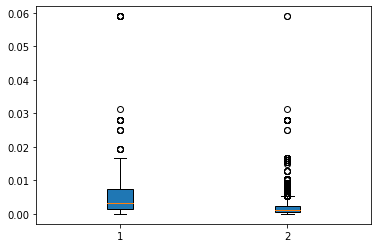

In [102]:
plt.boxplot([si_prueba1['value'], no_prueba1['value']], vert=True, patch_artist=True) 
plt.show()

Finalmente, el diagrama cajas indica como se distrubuye los datos genrados por el modelo comparando datos para usuarios que si aceptaron la oferta vs los que no. Se evidencia que los usuarios que si aceptaron la oferta (label1) presentan valores intercuartiles por encima de los datos para los usuarios que no aceptaron la oferta (label2). Esto indica la funcionalidad del modelo de prueba que se acaba de crear. 